<a href="https://colab.research.google.com/github/sanagahoi/Data-science-Project-2/blob/main/weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset observations:
Note:  9’s in a field (e.g.9999) indicate missing data or data that has not been received.

The five core values are:

PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)

SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)

SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)

TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file

TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import the libraries
import pandas as pd
from sklearn.linear_model import Ridge

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather-data.csv', index_col='DATE')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,
1970-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is from only one station (New Delhi Safdarjang, IN) so We don't need the station information Hence dropping the first 5 columns

In [5]:
df.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION','PRCP_ATTRIBUTES', 'SNWD_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES' ], axis=1, inplace=True)
df.sample(5)

,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,
1973-08-14,0.75,NaN,79.0,88.0,75.0
1994-10-01,0.00,NaN,81.0,95.0,67.0
1981-09-12,0.00,NaN,87.0,99.0,77.0
1995-09-21,0.00,NaN,86.0,97.0,76.0
1970-05-24,1.98,NaN,NaN,NaN,NaN


In [9]:
df.shape

(18846, 5)

In [6]:
null_values = df.isnull().sum()*100/df.shape[0]
null_values

PRCP    42.497082
SNWD    99.989388
TAVG     1.936751
TMAX    12.251937
TMIN    18.391171
dtype: float64

As mention in the above note : 9’s in a field (e.g.9999) indicate missing data or data that has not been received.

In [8]:
# Checking if there is any value of 9999 present in the dataset
df.apply(lambda x: (x==9999).sum())

PRCP    0
SNWD    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [9]:
valid_columns = df.columns[null_values > 5]
valid_columns

Index(['PRCP', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [10]:
weather = df[valid_columns].copy()

In [14]:
weather

,PRCP,SNWD,TMAX,TMIN
DATE,,,,
1970-01-01,0.0,NaN,NaN,NaN
1970-01-02,0.0,NaN,NaN,NaN
1970-01-03,0.0,NaN,NaN,NaN
1970-01-04,0.0,NaN,NaN,NaN
1970-01-05,0.0,NaN,NaN,NaN
...,...,...,...,...
2023-12-27,NaN,NaN,75.0,46.0
2023-12-28,NaN,NaN,72.0,47.0
2023-12-29,NaN,NaN,71.0,51.0


In [16]:
weather = weather.ffill()

In [17]:
weather.apply(pd.isnull).sum()

PRCP      0
SNWD    431
TMAX    370
TMIN    369
dtype: int64

In [18]:
weather.fillna(method='bfill', inplace=True)

In [20]:
weather.isna().sum()

PRCP    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

In [21]:
weather.dtypes

PRCP    float64
SNWD    float64
TMAX    float64
TMIN    float64
dtype: object

In [22]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='DATE', length=18846, freq=None)

In [23]:
weather.index.year

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=18846)

In [24]:
weather.index.year.value_counts().sort_index()

1970    365
1973    359
1974    363
1975    364
1976    359
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    364
1985    365
1986    365
1987    364
1988    359
1989    363
1990    349
1991    356
1992    311
1993    363
1994    361
1995    364
1996    366
1997    365
1998    363
1999    362
2000    366
2001    364
2002    364
2003    365
2004    366
2005    365
2006    365
2007    362
2008    366
2009    365
2010    361
2011    360
2012    366
2013    365
2014    365
2015    365
2016    365
2017    363
2018    365
2019    361
2020    366
2021    362
2022    365
2023    363
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

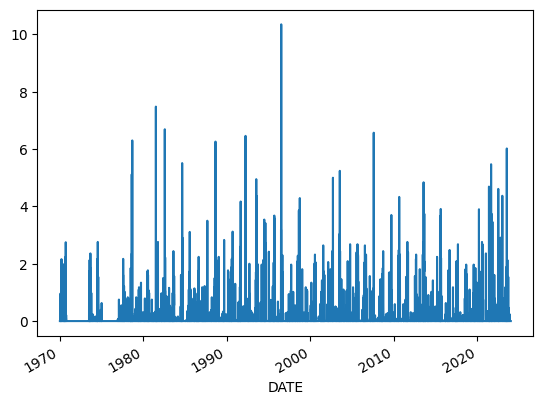

In [26]:
    weather.PRCP.plot()

<Axes: xlabel='DATE'>

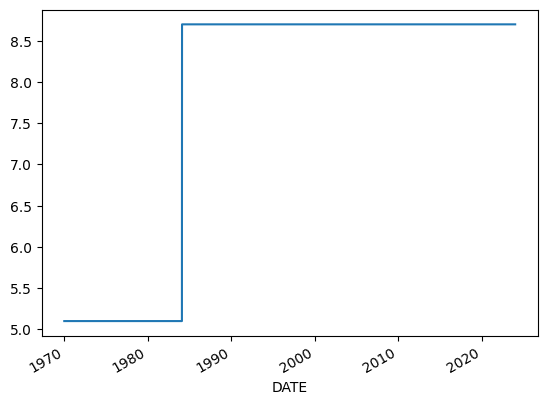

In [27]:
weather.SNWD.plot()

<Axes: xlabel='DATE'>

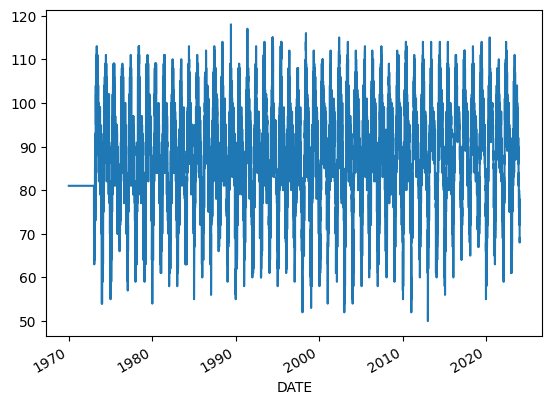

In [28]:
weather.TMAX.plot()

<Axes: xlabel='DATE'>

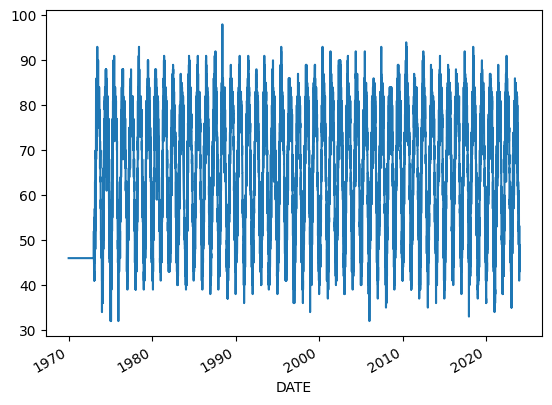

In [29]:
weather.TMIN.plot()

In [31]:
weather['target'] = weather.shift(-1)['TMAX']

In [32]:
weather

,PRCP,SNWD,TMAX,TMIN,target
DATE,,,,,
1970-01-01,0.0,5.1,81.0,46.0,81.0
1970-01-02,0.0,5.1,81.0,46.0,81.0
1970-01-03,0.0,5.1,81.0,46.0,81.0
1970-01-04,0.0,5.1,81.0,46.0,81.0
1970-01-05,0.0,5.1,81.0,46.0,81.0
...,...,...,...,...,...
2023-12-27,0.0,8.7,75.0,46.0,72.0
2023-12-28,0.0,8.7,72.0,47.0,71.0
2023-12-29,0.0,8.7,71.0,51.0,68.0


In [33]:
weather.isnull().sum()

PRCP      0
SNWD      0
TMAX      0
TMIN      0
target    1
dtype: int64

In [34]:
weather = weather.ffill()

In [35]:
weather.isnull().sum()

PRCP      0
SNWD      0
TMAX      0
TMIN      0
target    0
dtype: int64

In [36]:
# MODEL
rr = Ridge(alpha=0.1)

In [37]:
predictors = weather.columns[~weather.columns.isin(['target'])]
predictors

Index(['PRCP', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [38]:
def backtest(weather, model, predictors, start=3650, step=90):
  all_predictions = []

  for i in range(start, weather.shape[0], step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step), :]

    model.fit(train[predictors], train['target'])

    preds = model.predict(test[predictors])

    preds = pd.Series(preds, index=test.index)
    combined = pd.concat([test['target'], preds], axis=1)

    combined.columns = ['actual', 'prediction']

    combined['diff'] = (combined['prediction'] - combined['actual']).abs()

    all_predictions.append(combined)

  return pd.concat(all_predictions)

In [39]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1982-01-15,71.0,69.942507,1.057493
1982-01-16,70.0,71.636471,1.636471
1982-01-17,71.0,70.688966,0.311034
1982-01-18,72.0,71.502441,0.497559
1982-01-19,72.0,72.382930,0.382930
...,...,...,...
2023-12-27,72.0,75.168814,3.168814
2023-12-28,71.0,72.567764,1.567764
2023-12-29,68.0,71.947644,3.947644


In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions['actual'], predictions['prediction'])

2.344814299661023

In [42]:
predictions['diff'].mean()

2.344814299661023

In [43]:
def pct_diff(old, new):
  return(new-old)/old

def compute_rolling(weather, horizon, col):
   label = f'rolling_{horizon}_{col}'

   weather[label] = weather[col].rolling(horizon).mean()
   weather[f'{label}_pct'] = pct_diff(weather[label], weather[col])
   return weather
rolling_horizons = [3,14]
for h in rolling_horizons:
  for col in ['TMAX', 'TMIN', 'PRCP']:
    weather = compute_rolling(weather, h, col)

In [44]:
weather

,PRCP,SNWD,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,
1970-01-01,0.0,5.1,81.0,46.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,0.0,5.1,81.0,46.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.0,8.7,75.0,46.0,72.0,74.666667,0.004464,47.000000,-0.021277,0.0,NaN,75.357143,-0.004739,44.357143,0.037037,0.0,NaN
2023-12-28,0.0,8.7,72.0,47.0,71.0,74.333333,-0.031390,46.333333,0.014388,0.0,NaN,75.000000,-0.040000,44.571429,0.054487,0.0,NaN
2023-12-29,0.0,8.7,71.0,51.0,68.0,72.666667,-0.022936,48.000000,0.062500,0.0,NaN,74.571429,-0.047893,45.000000,0.133333,0.0,NaN


In [46]:
weather.isnull().sum()

PRCP                       0
SNWD                       0
TMAX                       0
TMIN                       0
target                     0
rolling_3_TMAX             0
rolling_3_TMAX_pct         0
rolling_3_TMIN             0
rolling_3_TMIN_pct         0
rolling_3_PRCP             0
rolling_3_PRCP_pct     14095
rolling_14_TMAX            0
rolling_14_TMAX_pct        0
rolling_14_TMIN            0
rolling_14_TMIN_pct        0
rolling_14_PRCP            0
rolling_14_PRCP_pct     8074
dtype: int64

In [45]:
# REMOVING FIRST 14 VALUES CONTAINING NAN
weather = weather.iloc[14:, :]

In [47]:
weather

,PRCP,SNWD,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,
1970-01-15,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,81.000000,0.000000,46.000000,0.000000,0.002857,-1.0
1970-01-16,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,81.000000,0.000000,46.000000,0.000000,0.002857,-1.0
1970-01-17,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,81.000000,0.000000,46.000000,0.000000,0.002857,-1.0
1970-01-18,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,81.000000,0.000000,46.000000,0.000000,0.002857,-1.0
1970-01-19,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,NaN,81.000000,0.000000,46.000000,0.000000,0.002857,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.0,8.7,75.0,46.0,72.0,74.666667,0.004464,47.000000,-0.021277,0.0,NaN,75.357143,-0.004739,44.357143,0.037037,0.000000,NaN
2023-12-28,0.0,8.7,72.0,47.0,71.0,74.333333,-0.031390,46.333333,0.014388,0.0,NaN,75.000000,-0.040000,44.571429,0.054487,0.000000,NaN
2023-12-29,0.0,8.7,71.0,51.0,68.0,72.666667,-0.022936,48.000000,0.062500,0.0,NaN,74.571429,-0.047893,45.000000,0.133333,0.000000,NaN


In [48]:
weather.isnull().sum()

PRCP                       0
SNWD                       0
TMAX                       0
TMIN                       0
target                     0
rolling_3_TMAX             0
rolling_3_TMAX_pct         0
rolling_3_TMIN             0
rolling_3_TMIN_pct         0
rolling_3_PRCP             0
rolling_3_PRCP_pct     14095
rolling_14_TMAX            0
rolling_14_TMAX_pct        0
rolling_14_TMIN            0
rolling_14_TMIN_pct        0
rolling_14_PRCP            0
rolling_14_PRCP_pct     8074
dtype: int64

In [49]:
weather = weather.fillna(0)

In [51]:
def expand_mean(df):
  return df.expanding(1).mean()

for col in ['TMAX', 'TMIN', 'PRCP']:
  weather[f'month_avg_{col}'] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
  weather[f'day_avg_{col}'] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [46]:
weather

,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,...,46.000000,0.000000,0.002857,-1.0,81.000000,81.000000,46.000000,46.000000,0.000000,0.000000
1970-01-16,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,...,46.000000,0.000000,0.002857,-1.0,81.000000,81.000000,46.000000,46.000000,0.000000,0.000000
1970-01-17,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,...,46.000000,0.000000,0.002857,-1.0,81.000000,81.000000,46.000000,46.000000,0.000000,0.000000
1970-01-18,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,...,46.000000,0.000000,0.002857,-1.0,81.000000,81.000000,46.000000,46.000000,0.000000,0.000000
1970-01-19,0.0,5.1,81.0,46.0,81.0,81.000000,0.000000,46.000000,0.000000,0.0,...,46.000000,0.000000,0.002857,-1.0,81.000000,81.000000,46.000000,46.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.0,8.7,75.0,46.0,72.0,74.666667,0.004464,47.000000,-0.021277,0.0,...,44.357143,0.037037,0.000000,0.0,73.329154,69.470588,47.252038,45.647059,0.011994,0.024902
2023-12-28,0.0,8.7,72.0,47.0,71.0,74.333333,-0.031390,46.333333,0.014388,0.0,...,44.571429,0.054487,0.000000,0.0,73.328321,69.057692,47.251880,45.307692,0.011986,0.006154
2023-12-29,0.0,8.7,71.0,51.0,68.0,72.666667,-0.022936,48.000000,0.062500,0.0,...,45.000000,0.133333,0.000000,0.0,73.326863,69.596154,47.254227,44.711538,0.011979,0.006154


In [52]:
predictors = weather.columns[~weather.columns.isin(['target'])]
predictors

Index(['PRCP', 'SNWD', 'TMAX', 'TMIN', 'rolling_3_TMAX', 'rolling_3_TMAX_pct',
       'rolling_3_TMIN', 'rolling_3_TMIN_pct', 'rolling_3_PRCP',
       'rolling_3_PRCP_pct', 'rolling_14_TMAX', 'rolling_14_TMAX_pct',
       'rolling_14_TMIN', 'rolling_14_TMIN_pct', 'rolling_14_PRCP',
       'rolling_14_PRCP_pct', 'month_avg_TMAX', 'day_avg_TMAX',
       'month_avg_TMIN', 'day_avg_TMIN', 'month_avg_PRCP', 'day_avg_PRCP'],
      dtype='object')

In [53]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1982-01-29,65.0,65.880162,0.880162
1982-01-30,67.0,65.818554,1.181446
1982-01-31,68.0,67.115252,0.884748
1982-02-01,71.0,68.141760,2.858240
1982-02-02,69.0,70.374420,1.374420
...,...,...,...
2023-12-27,72.0,74.121706,2.121706
2023-12-28,71.0,72.004885,1.004885
2023-12-29,68.0,71.259511,3.259511


In [56]:
mean_absolute_error(predictions['actual'], predictions['prediction'])

2.2948334991301955

In [57]:
predictions = predictions.sort_values('diff', ascending=False)

In [58]:
predictions

,actual,prediction,diff
DATE,,,
1997-06-18,82.0,104.227252,22.227252
1993-06-23,81.0,101.413880,20.413880
2003-12-23,55.0,73.882517,18.882517
1983-04-11,72.0,90.305787,18.305787
1996-06-08,86.0,104.270260,18.270260
...,...,...,...
2012-08-19,94.0,94.000695,0.000695
1995-04-04,90.0,89.999633,0.000367
2015-10-01,96.0,95.999722,0.000278


There are multiple ways to improve this model. we can create more features to make a precise predictions